Basic classification: Classify images of clothing

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.15.0


**Import the Fashion MNIST dataset**
This guide uses the Fashion MNIST dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels)

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


The train_images and train_labels arrays are the training set—the data the model uses to learn.
The model is tested against the test set, the test_images, and test_labels arrays.

In [20]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [21]:
train_images.shape

(60000, 28, 28)

In [22]:
len(train_labels)

60000

In [23]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [24]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

#Preprocess the data

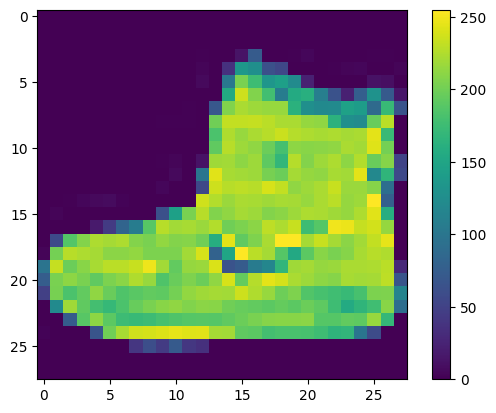

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way:

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

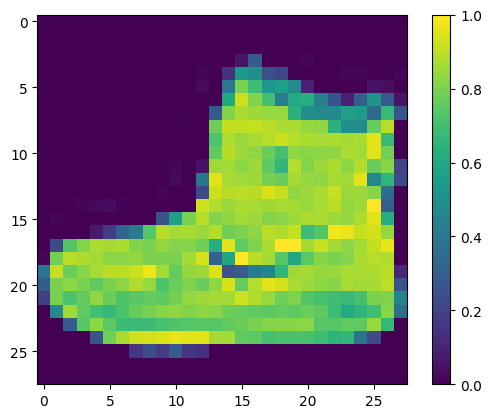

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the training set and display the class name below each image.

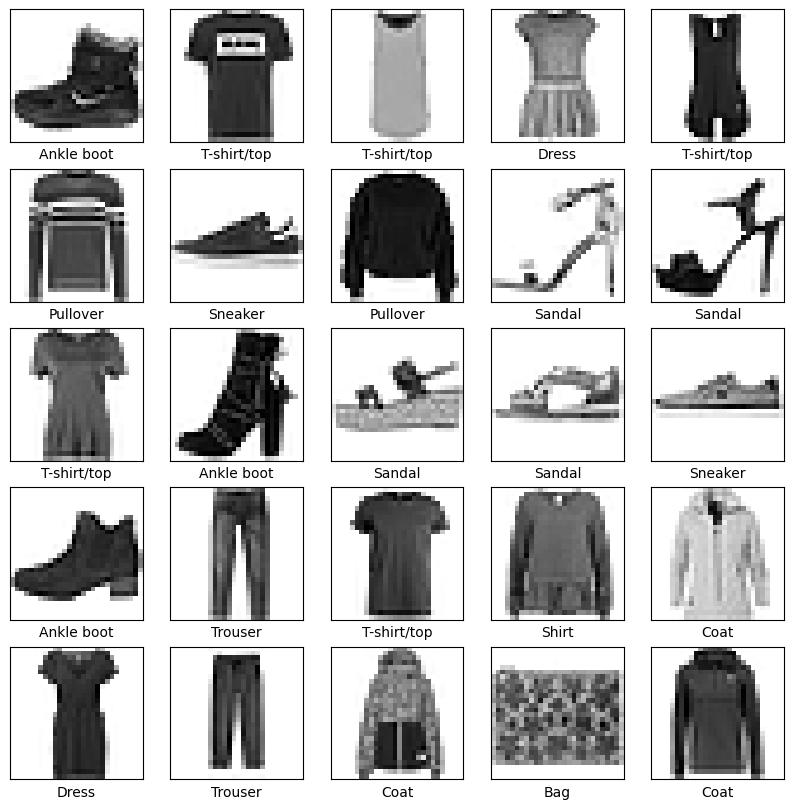

In [25]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

#Build the model

In [26]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. These are densely connected, or fully connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

**Loss function** —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
**Optimizer** —This is how the model is updated based on the data it sees and its loss function.
**Metrics** —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified

In [27]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#Train the model

In [28]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5001 - accuracy: 0.8261
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3781 - accuracy: 0.8643
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3382 - accuracy: 0.8776
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3135 - accuracy: 0.8850
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2951 - accuracy: 0.8906
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2822 - accuracy: 0.8956
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2695 - accuracy: 0.9009
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2578 - accuracy: 0.9039
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2500 - accuracy: 0.9067
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.239

#Evaluate accuracy

In [29]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3370 - accuracy: 0.8846 - 1s/epoch - 4ms/step

Test accuracy: 0.8845999836921692


#Make predictions

In [30]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [31]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 2s 5ms/step


Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [32]:
predictions[0]

array([8.3211177e-08, 7.6653112e-10, 1.6550711e-09, 3.4848970e-09,
       1.7623686e-09, 1.6512332e-04, 5.6202641e-08, 3.9066388e-03,
       2.5957817e-07, 9.9592799e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [33]:
np.argmax(predictions[0])

9

So, the model is most confident that this image is an ankle boot, or class_names[9]. Examining the test label shows that this classification is correct:

In [34]:
test_labels[0]

9

Graph this to look at the full set of 10 class predictions.

In [35]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

#Verify predictions

With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

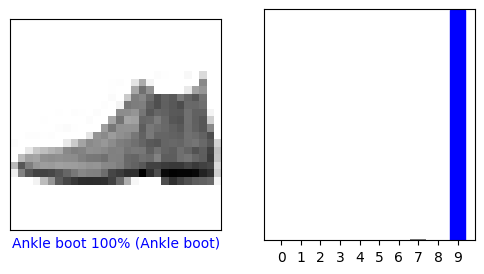

In [36]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

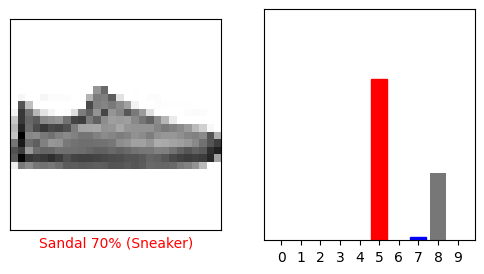

In [37]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Let's plot several images with their predictions. Note that the model can be wrong even when very confident

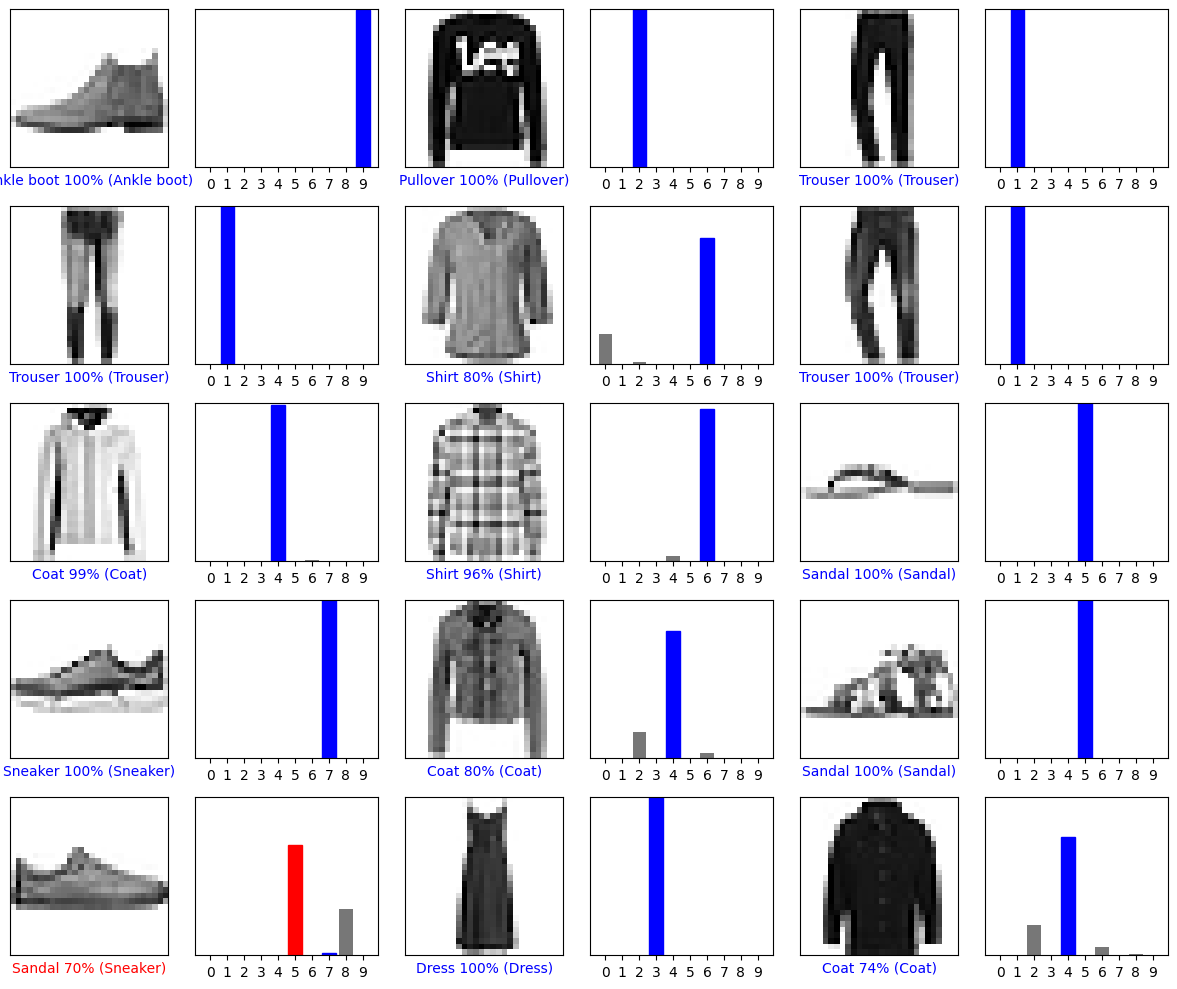

In [38]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

#Use the trained model

Use the trained model
Finally, use the trained model to make a prediction about a single image

In [39]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [40]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


#Now predict the correct label for this image:

In [41]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 23ms/step
[[7.02357374e-06 3.68620851e-16 9.98493552e-01 1.47807455e-08
  8.08206503e-04 2.45412008e-13 6.91261026e-04 2.77029291e-14
  6.51193099e-10 7.67285219e-15]]


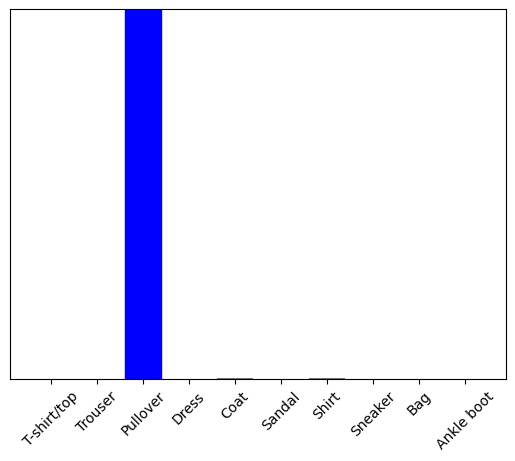

In [42]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

tf.keras.Model.predict returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [43]:
np.argmax(predictions_single[0])

2

And the model predicts a label as expected.